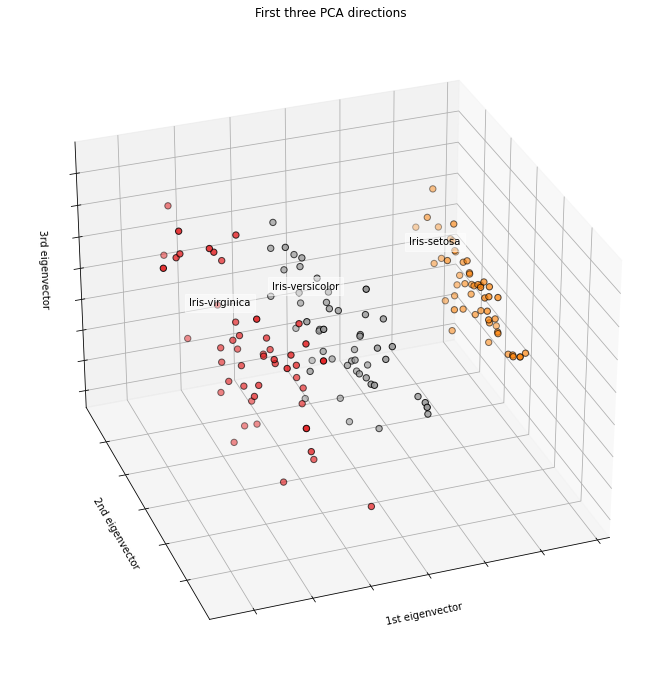

The number of features in the new subspace is  3


100.0

In [6]:
#Misalucha, Vince Rian M.
#4CSA

#Run this using Anaconda Jupyter

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
X = pd.DataFrame(iris.data, columns = iris.feature_names)

Y = iris.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

#Dimension Reduction
pca = PCA(n_components = 3)
X = pca.fit_transform(X)


%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(16, 9))
ax = Axes3D(fig, elev=-150, azim=110)


label = [('Iris-setosa', 0), ('Iris-versicolor', 1), ('Iris-virginica', 2)]
for name, label in label:
    ax.text3D(X[Y == label, 0].mean(),
              X[Y == label, 1].mean() + 1.5,
              X[Y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))

y = np.choose(Y, [1, 2, 0]).astype(np.float)


ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)

ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()
print("The number of features in the new subspace is " ,X.shape[1])

#Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
                        X, Y, test_size=0.20, random_state=15)

#Training
from sklearn import svm
model = svm.SVC(kernel='linear', decision_function_shape='ovr')
model.fit(X_train, Y_train)

#Testing
def model_testing(model, X_test, Y_test):
    points = 0
    predicted = []
    
    for x in range(len(X_test)):
        predicted.append(model.predict([X_test[x]])[0])
    
    for y in range(len(Y_test)):
        if(predicted[y] == Y_test[y]):
            points+=1
    
    return points/len(Y_test)*100

model_testing(model, X_test, Y_test)

#### 'Setosa' 0, 'Versicolor' 1, 'Virginica' 2

In [2]:
X_test[0]

array([ 0.33653037, -0.98840402, -0.19938976])

In [3]:
model.predict([X_test[0]])

array([1])

In [4]:
Y_test[0]

1